<a href="https://colab.research.google.com/github/ioloi1128/CDA/blob/main/CDA_week3_ClimAnom.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Install

In [3]:
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np

Define

In [ ]:
url = 'http://www.esrl.noaa.gov/psd/thredds/dodsC/Datasets/noaa.ersst.v5/sst.mnmean.nc'
ds = xr.open_dataset(url)
print(ds)
#ds

# select period
#ds = ds.sel(time=slice('1960', '2018'))
#ds

#actually load the data
ds.load()

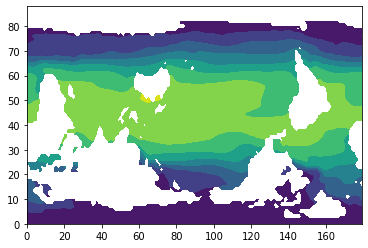

In [6]:
plt.contourf(ds['sst'][0,:,:])

In [42]:
ds=ds.reindex(lat=list(reversed(ds['lat'])))

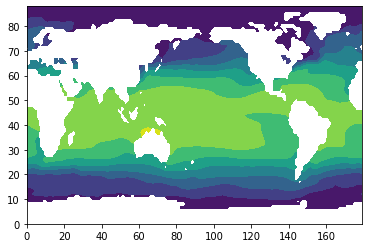

In [9]:
plt.contourf(ds['sst'][0,:,:])

Text(0.5, 1.0, 'MC Temperature (K)')

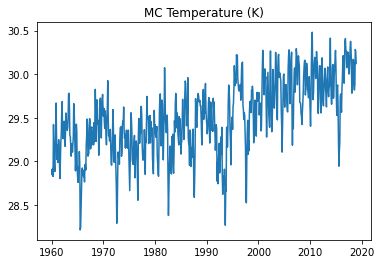

In [11]:
ds_pt=ds.sel(lat=0,lon=150,method='nearest')
plt.plot(ds_pt['time'],ds_pt['sst'])
plt.title('MC Temperature (K)')

In [43]:
ds_climo=ds.groupby('time.month').mean(dim='time')
ds_climo

<xarray.Dataset>
Dimensions:    (lat: 89, lon: 180, month: 12, nbnds: 2)
Coordinates:
  * lat        (lat) float32 -88.0 -86.0 -84.0 -82.0 ... 82.0 84.0 86.0 88.0
  * lon        (lon) float32 0.0 2.0 4.0 6.0 8.0 ... 352.0 354.0 356.0 358.0
  * month      (month) int64 1 2 3 4 5 6 7 8 9 10 11 12
Dimensions without coordinates: nbnds
Data variables:
    time_bnds  (month, nbnds) float64 9.969e+36 9.969e+36 ... 9.969e+36
    sst        (month, lat, lon) float32 nan nan nan nan ... -1.8 -1.8 -1.8 -1.8

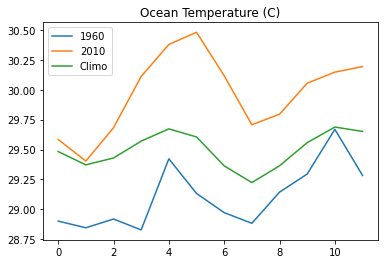

In [20]:
ds_ptclimo=ds_climo.sel(lat=0,lon=150,method='nearest')
ds_pt1960=ds_pt.sel(time=slice('1960-01-01','1960-12-01'))
ds_pt2010=ds_pt.sel(time=slice('2010-01-01','2010-12-01'))
                    
plt.plot(ds_pt1960['sst'])
plt.plot(ds_pt2010['sst'])                    
plt.plot(ds_ptclimo['sst'])
plt.title('Ocean Temperature (C)')
plt.legend(['1960','2010','Climo'])

In [21]:
ds_anoms=ds.groupby('time.month')-ds_climo
ds_anoms

<xarray.Dataset>
Dimensions:    (lat: 89, lon: 180, nbnds: 2, time: 708)
Coordinates:
  * lat        (lat) float32 -88.0 -86.0 -84.0 -82.0 ... 82.0 84.0 86.0 88.0
  * lon        (lon) float32 0.0 2.0 4.0 6.0 8.0 ... 352.0 354.0 356.0 358.0
  * time       (time) datetime64[ns] 1960-01-01 1960-02-01 ... 2018-12-01
    month      (time) int64 1 2 3 4 5 6 7 8 9 10 11 ... 2 3 4 5 6 7 8 9 10 11 12
Dimensions without coordinates: nbnds
Data variables:
    time_bnds  (time, nbnds) float64 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0
    sst        (time, lat, lon) float32 nan nan nan ... -0.0003316 -0.0004621

Text(0.5, 1.0, 'Ocean Temperature Anomalies (C)')

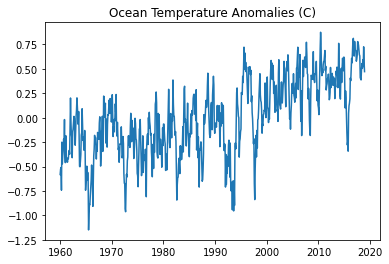

In [22]:
ds_anomspt=ds_anoms.sel(lat=0,lon=150,method='nearest')
plt.plot(ds_anomspt['time'],ds_anomspt['sst'])
plt.title('Ocean Temperature Anomalies (C)')